## Import of required libraries

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf


from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.models import Sequential
# layers to built deep learning model
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding
#metrics
from tensorflow.keras.metrics import Precision, Recall, Accuracy
from tensorflow.keras.callbacks import EarlyStopping



2023-11-21 09:27:02.499084: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-21 09:27:02.600667: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-21 09:27:02.600703: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-11-21 09:27:02.618491: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-21 09:27:03.924078: W tensorflow/stream_executor/platform/de

In [2]:
df = pd.read_csv('youtoxic_english_1000.csv')
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [3]:
bool_col = df.select_dtypes(include = ['bool'])
# Convert boolean columns to integers
df[bool_col.columns] = df[bool_col.columns].astype(int)
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,0,0,0,0,0,0,0,0,0,0,0,0
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,1,1,0,0,0,0,0,0,0,0,0,0
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,1,1,0,0,1,0,0,0,0,0,0,0
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,0,0,0,0,0,0,0,0,0,0,0,0
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df.columns.get_loc

<bound method Index.get_loc of Index(['CommentId', 'VideoId', 'Text', 'IsToxic', 'IsAbusive', 'IsThreat',
       'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist',
       'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate',
       'IsRadicalism'],
      dtype='object')>

In [5]:
df_sum=df.copy()

## Preprocess

In [6]:
df_sum['Hate'] = df.select_dtypes( include= ['int']).any(axis=1).astype(int)
df_sum.drop(df_sum.columns[[0,1,3,4,5,6,7,8,9,10,11,12,13,14]], axis=1, inplace=True)
df_sum.head()

,Text,Hate
0,If only people would just take a step back and...,0
1,Law enforcement is not trained to shoot to app...,1
2,\nDont you reckon them 'black lives matter' ba...,1
3,There are a very large number of people who do...,0
4,"The Arab dude is absolutely right, he should h...",0


In [7]:
X = df_sum['Text']
y = df_sum['Hate'].values

In [8]:
# set up dictionary size q-ty of words
MAX_FEATURES=100000

In [9]:
# set up vetorizer
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

2023-11-21 09:27:06.325094: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-11-21 09:27:06.325123: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-11-21 09:27:06.325145: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-d8103776-8bc3-42d5-af3b-9ad38442056c): /proc/driver/nvidia/version does not exist
2023-11-21 09:27:06.325361: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
vectorizer.adapt(X.values) #teach the vectorizer all the words in the text(train the vectorizer)
print(X)

0      If only people would just take a step back and...
1      Law enforcement is not trained to shoot to app...
2      \nDont you reckon them 'black lives matter' ba...
3      There are a very large number of people who do...
4      The Arab dude is absolutely right, he should h...
                             ...                        
995    I remember that they sent in the national defe...
996    Stats don`t represent the problem. Race baitin...
997    The quote from the mother... Wow that hit hard...
998                              this video is so racist
999        God, the narrator has such an annoying lisp. 
Name: Text, Length: 1000, dtype: object


In [11]:
vectorized_text = vectorizer(X.values) # vectorise text from numpy format (tokenization)
print(vectorized_text)

tf.Tensor(
[[  26   82   18 ...    0    0    0]
 [ 169  447    7 ...    0    0    0]
 [  55    9 2944 ...    0    0    0]
 ...
 [   2 1158   64 ...    0    0    0]
 [  12   73    7 ...    0    0    0]
 [ 229    2 3333 ...    0    0    0]], shape=(1000, 1800), dtype=int64)


In [12]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
#creating dataset
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(1000)
dataset = dataset.batch(8)
dataset = dataset.prefetch(8) # helps bottlenecks

In [13]:
batch_X, batch_y=dataset.as_numpy_iterator().next()
batch_X, batch_y

(array([[   2,  119,  314, ...,    0,    0,    0],
        [ 339, 4636,   61, ...,    0,    0,    0],
        [1072,    0,    0, ...,    0,    0,    0],
        ...,
        [1343,  206,   69, ...,    0,    0,    0],
        [  11,  136,  206, ...,    0,    0,    0],
        [  54,   15,    5, ...,    0,    0,    0]]),
 array([0, 0, 0, 0, 0, 0, 0, 1]))

In [14]:
len(dataset)

125

In [15]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))
print(len(train))
len(test)

87


12

## Build Deep learning model - Create Sequential Model

In [16]:
y[0]

0

In [17]:
#to sep up sequence
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 16))# +1 for uknown words,
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(16, activation='tanh'))) #tanh required by tensorflow
# Feature extractor Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
# Final layer 
model.add(Dense(1, activation='sigmoid')) 

In [18]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy']) # binary_crossentropy for binary classification

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          1600016   
                                                                 
 bidirectional (Bidirectiona  (None, 32)               4224      
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                        

In [20]:
#Implement early stopping to monitor the validation loss and stop training when it starts to degrade. 
#This prevents the model from overfitting.
early_stopping = EarlyStopping(monitor='val_loss', patience=3)


In [0]:
history = model.fit(train, epochs=5, validation_data=val,callbacks=[early_stopping])

Epoch 1/5
87/87 [==============================] - 153s 2s/step - loss: 0.6911 - accuracy: 0.5316 - val_loss: 0.6893 - val_accuracy: 0.5250
Epoch 2/5
87/87 [==============================] - 150s 2s/step - loss: 0.4133 - accuracy: 0.8420 - val_loss: 0.2363 - val_accuracy: 0.9200
Epoch 4/5
87/87 [==============================] - 152s 2s/step - loss: 0.2371 - accuracy: 0.9080 - val_loss: 0.0507 - val_accuracy: 1.0000
Epoch 5/5
87/87 [==============================] - 146s 2s/step - loss: 0.1299 - accuracy: 0.9540 - val_loss: 0.0390 - val_accuracy: 0.9950


## Learning curve

<Figure size 800x500 with 0 Axes>

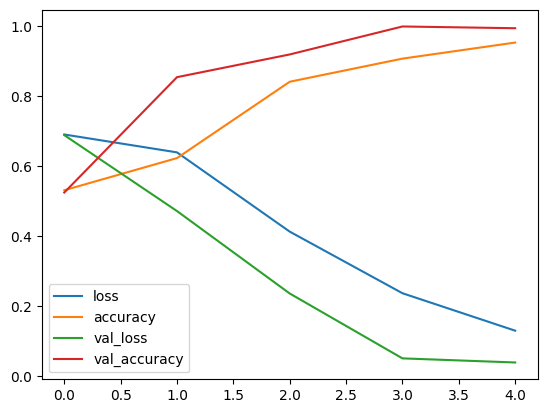

In [22]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

## Prediction

In [45]:
input_text = vectorizer('You freaking suck! I am going to hit you.')
input_text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([   9, 1820, 1117, ...,    0,    0,    0])>

In [46]:
model.predict(np.array([input_text]))

1/1 [==============================] - 0s 41ms/step


array([[0.97034264]], dtype=float32)

In [47]:
res = model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 41ms/step


In [48]:
(res > 0.5).astype(int)

array([[1]])

In [49]:
res.shape

(1, 1)

In [51]:
#checking the batch
batch_X, batch_y = test.as_numpy_iterator().next()


In [52]:
model.predict(batch_X)

1/1 [==============================] - 0s 50ms/step


array([[0.99385184],
       [0.93725574],
       [0.00170262],
       [0.08909667],
       [0.06246144],
       [0.00989008],
       [0.02018481],
       [0.09277406]], dtype=float32)

In [53]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 241ms/step


array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [54]:
batch_y

array([1, 1, 0, 0, 0, 0, 0, 0])

## Evaluation

In [55]:
pre = Precision()
re = Recall()
acc = Accuracy()

In [56]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    y_pred = model.predict(X_true)
   
    
    # Flatten the predictions - creating one big array
    y_true = y_true.flatten() 
    y_pred = y_pred.flatten()
    
    pre.update_state(y_true, y_pred)
    re.update_state(y_true, y_pred)
    acc.update_state(y_true, y_pred)

1/1 [==============================] - 0s 83ms/step


In [57]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result()}')

Precision: 1.0, Recall:1.0, Accuracy:0.0


## Model learned well how to predict hate speech and in 100% cases prediction of hate was correct and 100% model was able to detect hate patterns

In [58]:
y_true

array([1, 1, 0, 0, 1, 1, 0, 0])

In [59]:
y_pred

array([0.9922453 , 0.9962722 , 0.00755978, 0.00492459, 0.99476564,
       0.99830717, 0.00499821, 0.00748782], dtype=float32)

In [60]:
# Convert probabilities to predicted labels (0 or 1)
y_pred = np.round(y_pred).astype(int)

# Calculate accuracy
accuracy = np.sum(y_true == y_pred) / len(y_true)

print(f'Accuracy: {accuracy:.4f}')

Accuracy: 1.0000


In [61]:
overfitting = (0.95 - 1)*100
#overfitting_mean = np.mean(overfitting)

print(f'Overfitting: {overfitting:.1f}')

Overfitting: -5.0


## Save the model

In [62]:
#saving the model
model.save('hate_speech2.h5')

In [63]:
#open the model
model = tf.keras.models.load_model('hate_speech2.h5')

In [82]:
# test the model

input_str = vectorizer('i have dificalt relashions with my mother')

In [83]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 0s 74ms/step


In [84]:
res

array([[0.26478332]], dtype=float32)

In [44]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d8103776-8bc3-42d5-af3b-9ad38442056c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>